In [6]:
import os
import json
from collections import Counter, defaultdict
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [7]:
def node_purity(node, label):
    metadata = node['membership']['metadata']
    label_counts = Counter([x[3] for x in metadata])
    return (label_counts[label], len(metadata))

In [8]:
def compute_purities(fileindex):
    graph_path = '../../frontend/public/static/mapper_graphs/euclidean_l2_50_50/'
    filename = f'{fileindex}.json'

    with open(os.path.join(graph_path,filename), 'r') as graph_file:
        graph = json.load(graph_file)

        point_node_purities = defaultdict(list)

        for node in graph['nodes']:
            metadata = node['membership']['metadata']

            for i, point_id in enumerate(node['membership']['membership_ids']):
                point_node_purities[point_id].append(node_purity(node, metadata[i][3]))
                
    return point_node_purities

In [9]:
purities = [compute_purities(fileindex) for fileindex in tqdm(range(177))]

  0%|          | 0/177 [00:00<?, ?it/s]

In [10]:
point_purity_tracker = [[] for i in range(4282)]

for point_number in range(4282):
    for iteration in range(177):
        iteration_purity_dict = purities[iteration]
        point_purity_for_that_iteration = iteration_purity_dict[point_number]
        if point_purity_for_that_iteration:
            point_purity_tracker[point_number].append((iteration, point_purity_for_that_iteration))
        else:
            point_purity_tracker[point_number].append((iteration, None))

In [11]:
def get_xy(point_purity_history):
    def purity_summary(purities):
        if purities is None:
            return 0
        else:
            numerator = sum([x[0] for x in purities])
            denominator = sum([x[1] for x in purities])
            return numerator / denominator
        
    x = [p[0] for p in point_purity_history]
    y = [purity_summary(p[1]) for p in point_purity_history]
    
    return x, y

<AxesSubplot:>

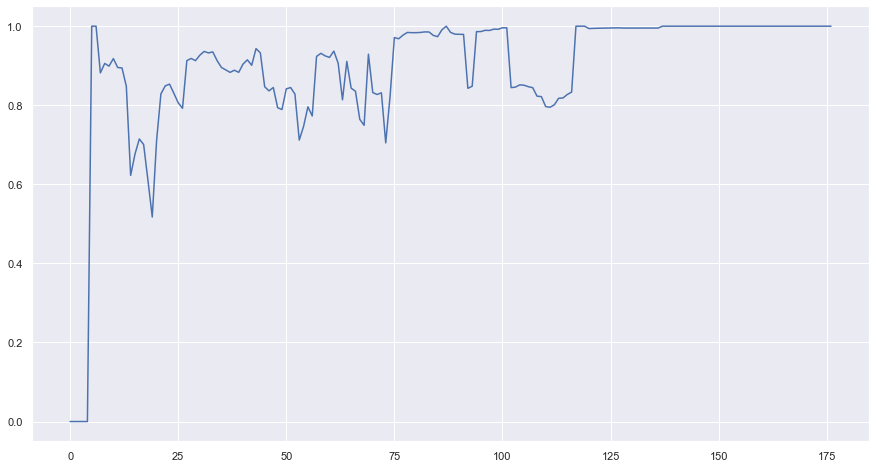

In [12]:
plt.figure(figsize=(15, 8))
point_index = 10
x, y = get_xy(point_purity_tracker[point_index])
sns.lineplot(x=x, y=y)

  0%|          | 0/100 [00:00<?, ?it/s]

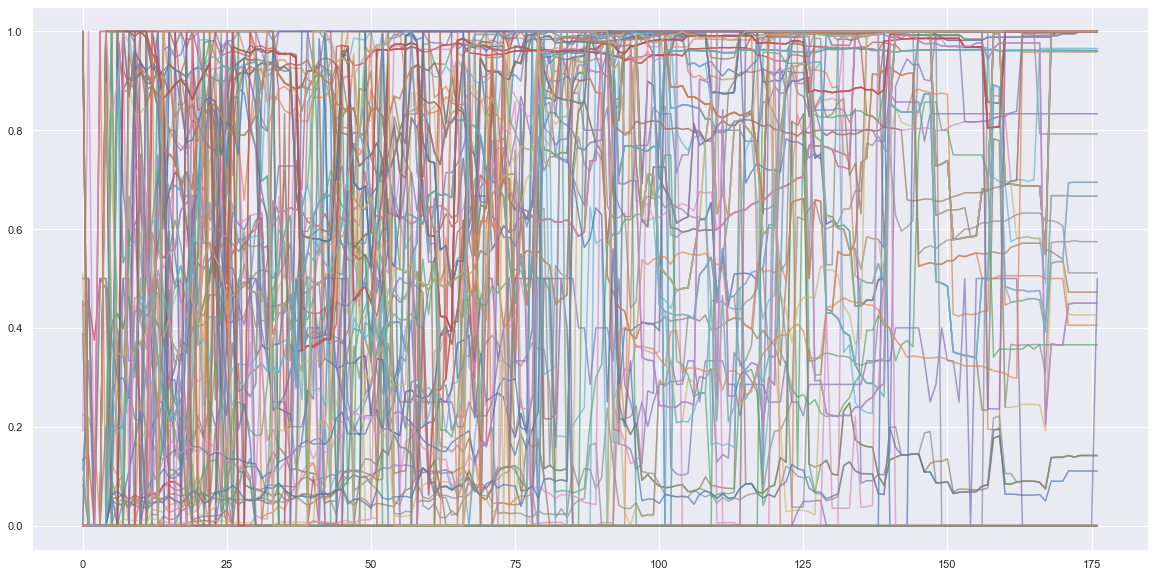

In [15]:
plt.figure(figsize=(20, 10))

for point_index in tqdm(range(100)):
    x, y = get_xy(point_purity_tracker[point_index])
    sns.lineplot(x=x, y=y, alpha=0.7)